In [2]:
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import requests
import io
import random

In [3]:
def add_gaussian_noise(image, mean, std_dev):
    row, column = image.shape
    gaussian_noise = np.random.normal(mean, std_dev, (row, column))
    noisy_image = image + gaussian_noise
    return noisy_image

In [4]:
def filtered_image(image, mask):
    row, column = image.shape
    mask_height, mask_width = mask.shape
    filtered_image = np.zeros((row, column))
    for i in range(row - mask_height + 1):
        for j in range(column - mask_width + 1):
            rows = range(i, i + mask_height)
            columns = range(j, j + mask_width)
            part = image[np.ix_(rows, columns)] * mask
            filtered_image[i, j] = part.sum()
    return filtered_image

In [5]:
def add_salt_and_pepper_noise(image):
    row, column = image.shape
    # Randomly picking pixels and making them white
    number_of_pixels = random.randint(300, 8000)
    for i in range(number_of_pixels):
        y_coord = random.randint(0, row - 1)
        x_coord = random.randint(0, column - 1)
        image[y_coord, x_coord] = 255

    # Randomly picking pixels and making them black
    number_of_pixels = random.randint(300, 8000)
    for i in range(number_of_pixels):
        y_coord = random.randint(0, row - 1)
        x_coord = random.randint(0, column - 1)
        image[y_coord, x_coord] = 0

    return image

In [6]:
def median_filter(image):
    row, column = image.shape
    mh, mw = 3, 3
    new_image = np.zeros((row, column))
    for i in range(row - mh + 1):
        for j in range(column - mw + 1):
            rows = range(i, i + mh)
            cols = range(j, j + mw)
            part = np.sort(np.ravel(image[np.ix_(rows, cols)]))
            new_image[i, j] = part[5]
    return new_image

In [12]:
# Load the image
image_path = 'images/disaster_girl.jpg'
img = Image.open(image_path)

# Convert image to grayscale
gray_img = img.convert('L')
gray_array = np.array(gray_img)

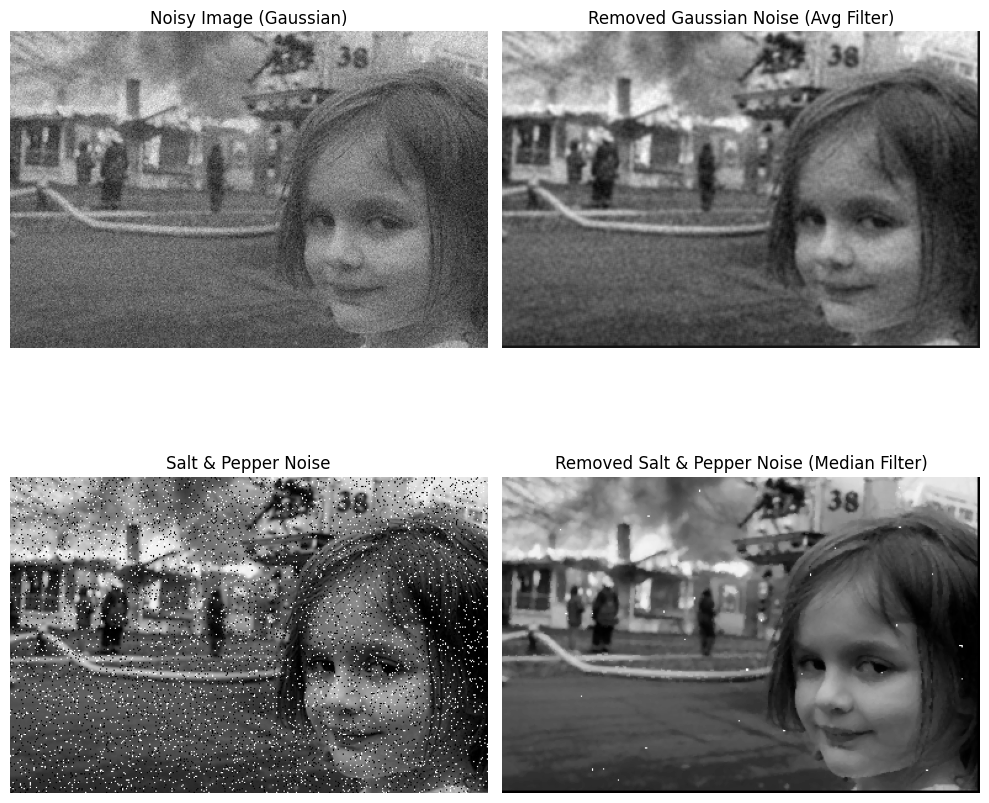

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))

# Noisy Image (Gaussian)
noisy_image = add_gaussian_noise(gray_array, 0, 20)
plt.subplot(2, 2, 1)
plt.imshow(noisy_image, cmap='gray')
plt.title('Noisy Image (Gaussian)')
plt.axis('off')

# Removed Gaussian Noise (Avg Filter)
mask_size = 3
mask = np.ones((mask_size, mask_size)) / (mask_size ** 2)
removed_gaussian_noise = filtered_image(noisy_image, mask)
plt.subplot(2, 2, 2)
plt.imshow(removed_gaussian_noise, cmap='gray')
plt.title('Removed Gaussian Noise (Avg Filter)')
plt.axis('off')

# Salt & Pepper Noise
image_with_salt_pepper = add_salt_and_pepper_noise(gray_array)
plt.subplot(2, 2, 3)
plt.imshow(image_with_salt_pepper, cmap='gray')
plt.title('Salt & Pepper Noise')
plt.axis('off')

# Removed Salt & Pepper Noise (Median Filter)
removed_salt_pepper_noise = median_filter(image_with_salt_pepper)
plt.subplot(2, 2, 4)
plt.imshow(removed_salt_pepper_noise, cmap='gray')
plt.title('Removed Salt & Pepper Noise (Median Filter)')
plt.axis('off')

plt.tight_layout()
plt.show()
